# DataStory "ChartLyrics"

Ina Widmer, Michael Job

Do Social Media words appear in Chartlyrics ?

Source of swiss charts:

<img src="data/screenshot_hitparade.JPG" style="width: 600px"/>

Source of lyrics:

In [5]:
from IPython.display import IFrame
IFrame(src='https://lyrics.ovh/', width=700, height=300)

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
plt.rcParams.update({'font.size':22})
#  Analyse swiss charts data
#  from 7.10.2018 until 4.10.1998

### read json data from file into pandas object
path2data = 'data/charts_lyrics_1998-2018.json'
data = pd.read_json(path_or_buf=path2data, orient=None, typ='frame', dtype=True, convert_axes=True, convert_dates=True,
                 keep_default_dates=True, numpy=False, precise_float=False, date_unit=None, encoding='utf-8',
                 lines=False, chunksize=None, compression='infer')


In [7]:
## Get n most common words for data
def get_top_n_words(lyrics, n=None):
    vec = CountVectorizer(stop_words='english').fit(lyrics)
    bag_of_words = vec.transform(lyrics)    # matrix where each row represents a specific text
    sum_words = bag_of_words.sum(axis=0)    # vector that contains the sum of each word occurrence
    words_freq = pd.DataFrame([(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()], columns=['word', 'occurrence'])
    words_freq = words_freq.sort_values(by=['occurrence'], ascending=False)
    return words_freq.head(n)

In [8]:
### Descriptive stats of words for all data (1998 - 2018)
## Get all words
df_all = get_top_n_words(data.lyrics)
print("All words:")
df_all.describe()


All words:


,occurrence
count,22138.000000
mean,15.842036
std,113.251787
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,5366.000000


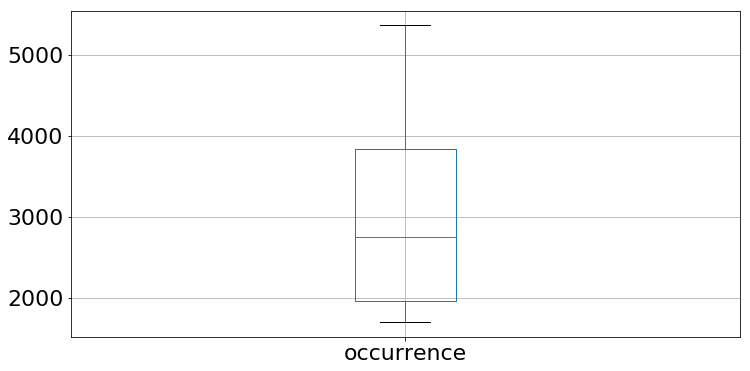

In [9]:
## Get top 20 words
fig, ax = plt.subplots(figsize=(12,6))
top20_words = get_top_n_words(data.lyrics, 20)
top20_words.boxplot()
plt.show()

In [10]:
def plot_top_words():
    ### Plot Top words for all Data (1998 - 2018)
    common_words = get_top_n_words(data.lyrics, 15) ## Get n most common words
    common_words = common_words.sort_values(by=['occurrence'])
    nr_words = len(common_words)

    fig, ax = plt.subplots(figsize=(12,8))
    index = np.arange(nr_words)
    bar_width = 0.3
    opacity = 0.4

    rec = plt.barh(index, common_words['occurrence'], bar_width,
                     alpha=opacity,
                     color='b',
                     label='Ocurrences')

    plt.xlabel('Word Count')
    plt.title('Most Frequent word in lyrics (1998 - 2018)')
    plt.yticks(index, common_words['word'])
    plt.tight_layout()
    plt.show()

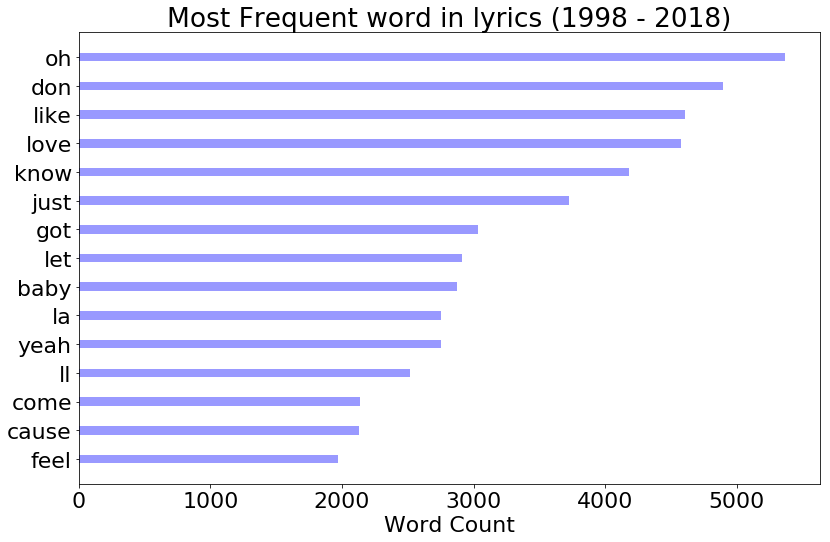

In [11]:
plot_top_words()

In [12]:
def getWordCountPerYear(word):
    # Partition data into years
    years = [g for n, g in data.set_index('date').groupby(pd.Grouper(freq='Y'))]

    wordFreq = pd.DataFrame(columns=['year','occurrence'])
    # Get most common words for each year
    for i in range(len(years) - 1):
        common_words = get_top_n_words(years[i].lyrics)
        # Find count for word
        record = common_words[common_words['word'] == word]
        
        # if word doesn't exist set occurrence to 0
        if record.empty: 
            occurrence = 0 
        else:
            occurrence = record.occurrence.values[0]
        wordFreq = wordFreq.append({'year': years[i].index[0].year,'occurrence': occurrence}, ignore_index=True)
    return wordFreq

In [15]:
def plot_common_words():
    ## Get count per year for specific words
    feel = getWordCountPerYear("feel")
    love = getWordCountPerYear("love")
    yeah = getWordCountPerYear("yeah")

    # Plot word count 
    plt.figure(figsize=(15,8))
    plt.title('Word Count per Year')
    plt.plot(feel['year'], feel['occurrence'], label = 'feel')
    plt.plot(love['year'], love['occurrence'], label = 'love')
    plt.plot(yeah['year'], yeah['occurrence'], label = 'yeah')
    plt.xticks(np.arange(min(feel['year']), max(feel['year'])+1, 2.0))
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.grid()
    plt.legend()
    plt.show()

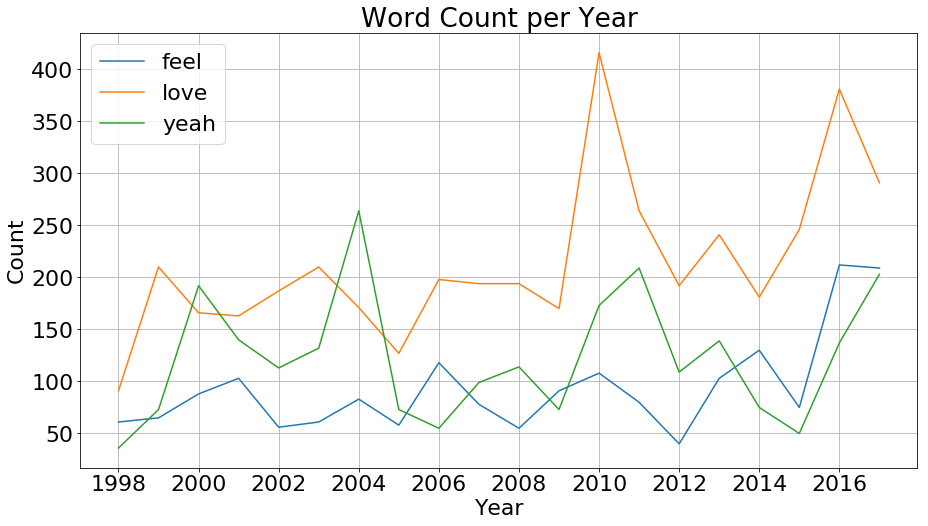

In [16]:
plot_common_words()

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
text = " ".join(lyrics for lyrics in data.lyrics)
print ("There are {} words in the combination of all lyrics.".format(len(text)))
wordcloud = WordCloud(stopwords=stopwords, width=1200, height=900, max_font_size=150, max_words=100, background_color="white", collocations=False).generate(text)

There are 3530835 words in the combination of all lyrics.


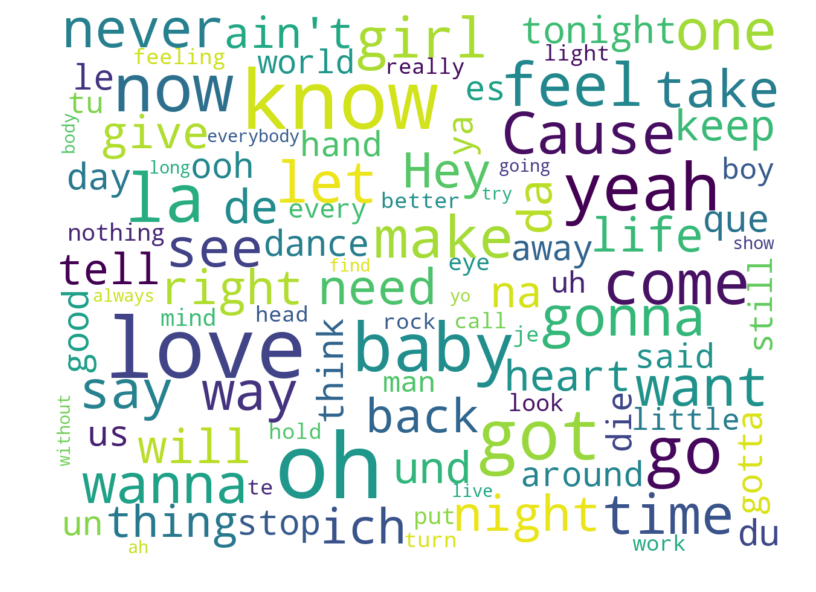

In [18]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
import pandas as pd
social_data = pd.read_json(path_or_buf='data/socialMediaWords.json')
print(social_data)

          some
0     facebook
1      twitter
2         xing
3     linkedin
4      youtube
5    instagram
6     snapchat
7     whatsapp
8        tweet
9     unfriend
10  influencer
11     google+
12     mention
13        post
14     retweet
15      repost
16       share
17     hashtag
18      social
19       media
20        chat
21    emoticon
22      emotji
23   pinterest
24      tumblr
25       weibo
26      flickr


In [20]:
def get_word_count_per_year(word):
    # Partition data into years
    years = [g for n, g in data.set_index('date').groupby(pd.Grouper(freq='Y'))]

    word_freq = pd.DataFrame(columns=['year', 'occurrence'])
    # Get most common words for each year
    for i in range(len(years) - 1):
        common_words = get_top_n_words(years[i].lyrics)
        # Find count for word
        record = common_words[common_words['word'] == word]
        
        # if word doesn't exist set occurrence to 0
        if record.empty: 
            occurrence = 0 
        else:
            occurrence = record.occurrence.values[0]
        word_freq = word_freq.append({'year': years[i].index[0].year, 'occurrence': occurrence}, ignore_index=True)
    return word_freq


social_data_counts_per_year = []


def save_count(row):
    counts = get_word_count_per_year(row.some)
    if sum(counts.occurrence) > 0:
        social_data_counts_per_year.append([row.some, counts])  # Add only social words that occure in lyrics
        
        
social_data.apply(save_count, axis=1)        
social_data_counts_per_year = pd.DataFrame(social_data_counts_per_year)
print("done")

done


In [23]:
def plot_some():
    
    # Plot Social Words per Year
    def plot_row(row):
        _ = ax.plot(row[1]['year'], row[1]['occurrence'], '--', label=row[0], linewidth="2")
        _ = ax.set_xticks(np.arange(min(row[1]['year']), max(row[1]['year'])+1, 2.0))

        
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))
    fig.patch.set_facecolor('white')

    social_data_counts_per_year.apply(plot_row, axis=1)

    _ = ax.set_title('Social Words per Year')
    _ = ax.set_xlabel('Year')
    _ = ax.set_ylabel('Count')
    _ = ax.grid()
    ax.legend()

    ymin, ymax = ax.get_ylim()
    _ = ax.vlines(2004, ymin, ymax, color="blue")
    _ = ax.text(2004-.5, ymax/2, "Facebook", rotation=90, verticalalignment="center", color="blue")
    _ = ax.vlines(2010, ymin, ymax, color="purple")
    _ = ax.text(2010-.5, ymax/2, "Instagram", rotation=90, verticalalignment="center", color="purple")
    _ = ax.vlines(2006, ymin, ymax, color="cyan")
    _ = ax.text(2006-.5, ymax/2, "Twitter", rotation=90, verticalalignment="center", color="cyan")
    _ = ax.vlines(2005, ymin, ymax, color="red")
    _ = ax.text(2005-.5, ymax/2, "Youtube", rotation=90, verticalalignment="center", color="red")
    _ = ax.vlines(2009, ymin, ymax, color="green")
    _ = ax.text(2009-.5, ymax/2, "Whatsapp", rotation=90, verticalalignment="center", color="green")

    plt.show()

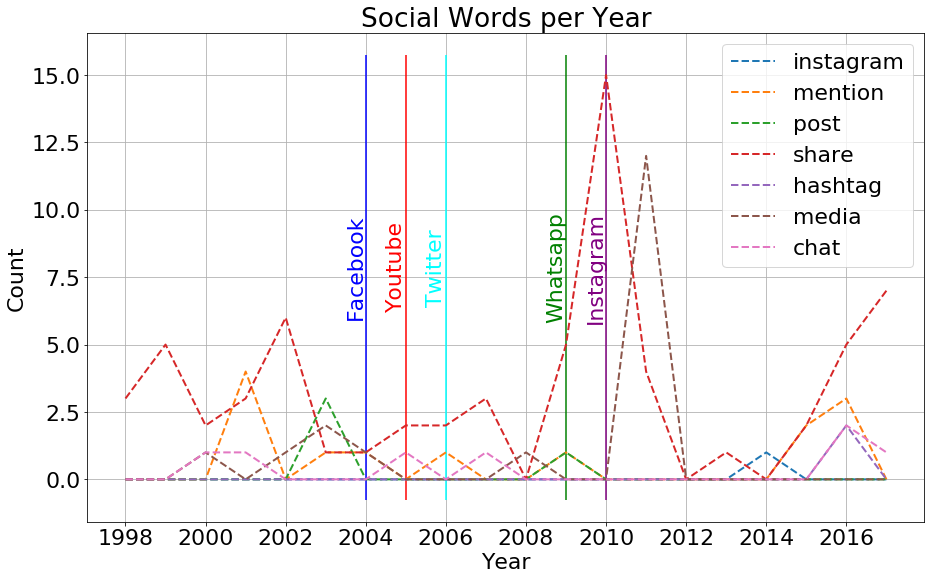

In [24]:
plot_some()

## Conclusion and further studies
Social media buzz words do not really appear in chart songs.

Possible further analysis:
- more songs (we had top 25 each 3 months)
- look for other languages than english
- don't focus on chart songs only